# CSCI 3352 Biological Networks, Spring 2023, Prof. Clauset
Submit here: https://canvas.colorado.edu/courses/91192

# Problem Set 4 : Predicting missing node attributes in networks

***

**Name**: ANNA HIRSCHMANN

Collaborators: I discussed the concepts and problems with Julia Bao and Carol Chang

***

This assignment is due on Canvas by **11:55pm on Friday, February 17th**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 90 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Canvas.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* networkx [Documentation](https://networkx.github.io/documentation/stable/) and [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
* igraph [Documentation](https://igraph.org/python/versions/latest/install.html) and [Tutorial](https://igraph.org/python/tutorial/0.9.8/tutorial.html)

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Label me this, label me that (85 pts total)

In this problem, you will implement and systematically evaluate the `local smoothing` prediction algorithm. We'll build up this numerical experiment in stages. First, you'll implement the `baseline` predictor, then the `local smoothing` predictor. After that, you'll construct a *good* test of the `local smoothing` algorithm for a single choice of a _missingness function_ $f$. And finally, you'll write a wrapper around this function to explore how performance varies as a function of $f$.

For the last two steps, we'll use a real-world network derived from the genes of the human malaria parasite _P. falciparum_. These genes are located in one of nine highly variable regions (HVRs) in the DBLa domain of the parasite's var protein. In this network, nodes are antigen *genes* of the parasite and two nodes are connected if they contain evidence of past non-homologous *recombination* (basically, if they share a long subsequence). The node metadata represents a biologically-relevant classification scheme of the nodes.
* Visit the [Index of Complex Networks](https://icon.colorado.edu/) and obtain the `HVR_5` network and `metadata_CysPoLV` node attribute files for the ICON entry _Malaria var DBLa HVR networks_.

### Problem 1-A (10 pts) Malaria gene recombination network

To warm up, load both the *HVR_5* network and treat it as a simple graph (edges unweighted and undirected; no multi-edges; no self-loops), and the *metadata_CysPoLV* file. Then calculate and report the following.
* number of nodes $n$
* (undirected) edges $m$
* mean degree $\langle k \rangle$
* clustering coefficient $C$
* mean geodesic distance $\langle \ell \rangle$
* a `ridiculogram` of the network, using the provided `drawGz()` function
* a `bar` plot showing the attribute frequencies in the `metadata` file

Note: In the code box below, the preamble takes care of the tricky part of correctly aligning the network data with the node metadata, so that you can focus on the analysis parts.

In [135]:
## COPIED MY CODE TO COMPUTE MEAN GEODESIC DISTANCE FROM PROBLEM SET 3
def compute_MGD(G):
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)

    shortest_paths = nx.all_pairs_shortest_path_length(G)
    
    num_tot_paths = 0
    tot_l = 0
    
    for paths in shortest_paths:
        tot_l += sum(paths[1].values())
        num_tot_paths += (len(paths[1]) - 1) # subtract one for the 0-length path from node to itself
    
    return tot_l / num_tot_paths

In [136]:
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : a ridiculogram plot of G
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])-1])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 50
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

In [137]:
# this data set is from :
# D. B. Larremore et al., "A network approach to analyzing highly recombinant malaria parasite genes."
#                          PLOS Computational Biology 9(10), e1003268 (2013).
fname1 = 'HVR_5.txt'
fname2 = 'metadata_CysPoLV.txt'

# read in the network file (an edge list)
print(f'reading the network file  : {fname1}')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=int)  # import simple graph, index nodes by integers (not strings)

# read in the node metadata (note: there are more metadata values here than nodes in G)
print(f'reading the metadata file : {fname2}\n')
f = open('./' + fname2,'r')
labels = []
for line in f:
    labels.append(int(line.rstrip('\n'))) # strip the \n and convert label to an int
f.close() 

# for each node i in G, add (j: j's label) to a dictionary z
z = {}
for i in range(0,len(labels)):
    if i+1 in G.nodes():
        z[i+1] = labels[i] 
    
####################################
##### do not modify above here #####

n = G.number_of_nodes()
m = G.number_of_edges()
kmean = (2*m) /n
ellmean = compute_MGD(G) # applied the function I defined in Problem Set 3
C = nx.transitivity(G)

##### do not modify below here #####
####################################

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

reading the network file  : HVR_5.txt
reading the metadata file : metadata_CysPoLV.txt

number of nodes, n  = 298
number of edges, m  = 2684
mean degree,    <k> = 18.01
clustering coefficient, C     =  0.36
mean geodesic distance, <ell> =  2.92


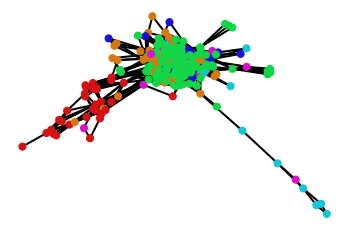

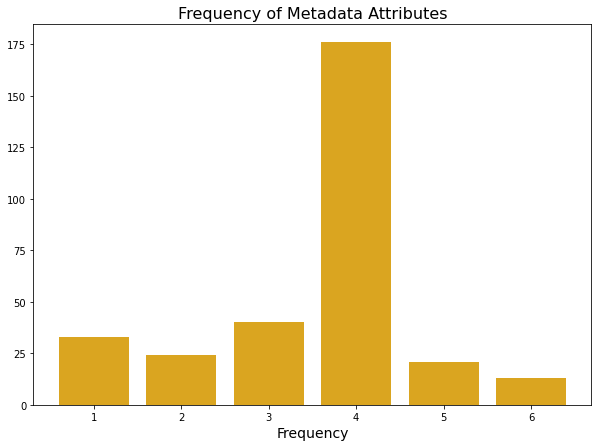

In [138]:
## RIDICULOGRAM
drawGz(G,z) # uses provided function to plot a ridiculogram of the data

## ATTRIBUTE FREQUENCY PLOT

label_cts = {val: 0 for val in set(labels)} # initializes a dictionary with labels as keys,
                                            # will populate with a count to get data for bar graph

for i in range(len(labels)):
    label_cts[labels[i]] += 1

# creates the label count bar graph
plt.figure(figsize = (10, 7))
plt.bar(label_cts.keys(), label_cts.values(), color = 'goldenrod')
plt.title('Frequency of Metadata Attributes', fontsize = 16)
plt.xlabel('Attribute', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.show()

Above, we see a ridiculogram of our malaria network dataset, in which nodes are colored (categorical label) based on metadata associated with this network. The second visual shows the relative frequency of the attributes that appear in the network, with 4 standing out as being significantly more popular than any of the other label possibilities. 

### Problem 1-B (10 pts) : the baseline

* Write the function `predictLabel_baseline(x)` to implement the `baseline` node attribute predictor given in Lecture Notes 4.
  * It takes as input `x`, a dictionary of observed labels (node i: label of i), within which a $-1$ indicates a missing label.
  * It returns as output, the result of the baseline predictor.
* Then, write code in the cell below that to
  * apply your predictor to each of the nodes in the $G_\circ$ given below,
  * for each prediction, print a statement of the form `node 1 : -1 -> 2 (baseline)` that gives the node a prediction was made for, its observed `x` value and its predicted value, and then
  * store the final labels (non-missing observed + predictions) in a dictionary `xp`.

Note: the preamble below includes the graph `Go`, and a given labeling `x`, and will display both.

In [6]:
import random as rnd
def predictLabel_baseline(x):
    # input:  x, dict of observed labels
    # output: baseline predictor, Uniform(\vec{x}-\emptyset)
    
    choices = [x[node] for node in x if x[node] != -1] # a list, with multiplicities of all the observed labels
                                                       # (does not include nodes missing labels)
    
    for node in x:
        if x[node] == -1: # if the node does not have a label
            x[node] = rnd.choice(choices) # pick randomly from empirical set
            print(f'node {node}: -1 -> {x[node]} (baseline)')
    #print(choices)
    #print(x)
    return x

initial node labels and network:
node 1, label -1
node 2, label 1
node 3, label 2
node 4, label 2
node 5, label -1
node 6, label 3


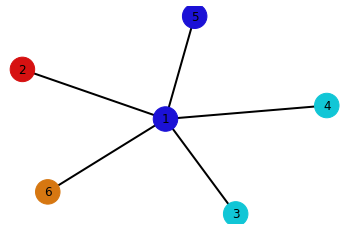


applying baseline predictor to
node 1: -1 -> 1 (baseline)
node 5: -1 -> 3 (baseline)

final node labels and network:
node 1, label 1
node 2, label 1
node 3, label 2
node 4, label 2
node 5, label 3
node 6, label 3


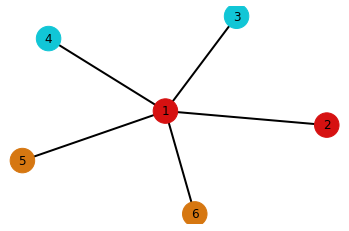

In [7]:
#import random as rnd
seed = 822 # your MMYY birthday here
rnd.seed(seed)

# a small network to test your baseline predictor
Go = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6)])

# and its observed node labels x, as a dictionary
x = {1: -1, 2: 1, 3: 2, 4: 2, 5: -1, 6: 3}

# to start, display the observed labels and draw G with them
print(f'initial node labels and network:')
for i in x:
    print(f'node {i}, label {x[i]}')
drawGz(Go,x)

xp = {} # put your node labels, after predictions, here (as a dictionary)
print(f'\napplying baseline predictor to')

####################################
##### do not modify above here #####

xp = predictLabel_baseline(x) # defines a new predicted label dictionary where unlabeled nodes are replaced with a randomly selected label

##### do not modify above here #####
####################################
print(f'\nfinal node labels and network:')
for i in xp:
    print(f'node {i}, label {xp[i]}')
drawGz(Go,xp)

Nodes 1 and 5 on the original graph were unlabeled, so the second graph shows the result of applying the baseline predictor to those two nodes, which assigns them labels randomly selected from the empirical data.

### Problem 1-C (15 pts) : local smoothing

* Now write a function `predictLabel_local(G,i,x,flag)` that implements the `local smoothing` node attribute predictor for categorical variables given in Lecture Notes 4.
  * It takes as input the graph `G`, a node index `i`, and a dictionary of observed labels `x`, as before.
  * As in Problem Set 2, `flag` is a binary variable that toggles whether for each prediction, it prints a statement of the form `node 1 : -1 -> 2 ([method])`, where `method` is either `smoothing` or `baseline`, depending on which predictor was applied.

* Then,
  * apply your predictor (with `flag=1`) to each of the nodes in the $G_\circ$ given below, and then
  * store the final labels (non-missing observed + predictions) in a dictionary `xp`.

Hint 1: Don't forget that the `local smoothing` predictor should default to the `baseline` predictor in the event that all of a node's neighbors are missing their labels.

Hint 2: To avoid having the output of an early prediction influence the output of a later prediction, for each node $i$, use the `xp` variable to store both the output of any prediction, or the observed label (if no prediction is made). That is, make your predictions *synchronously*.

In [81]:
# This helper function finds the mode(s) of an input list and will be used to implement the local smoothing predictor defined below

def mode(lst):
    # imputs: list of values
    # outputs: a list containing the mode(s) of the input list
    counts = [(i, lst.count(i)) for i in set(lst)] # a list of tuples corresponding to (label, # of appearances of the label)
    
    max_ct = 0
    for elt, ct in counts:
        if ct > max_ct:
            max_ct = ct # updates max count to be the largest label count so far

    return [i for i, ct in counts if ct == max_ct] # returns a list of most frequent label(s)

In [235]:
def predictLabel_local(G,i,x,flag):
    # input:  G, simple networkx graph
    #         i, a node in G whose label we will predict
    #         x, dict of observed labels for G
    #         flag, binary value
    # output: local smoothing predictor output for i
    #         a print statement (see instructions) if flag=1

    baseline_choices = [x[node] for node in x if x[node] != -1] # all the empirical data for nodes that have labels
    
    if baseline_choices == []: # checks if there is at least one labeled node in the network, otherwise predictions can't be made
                               # this was giving me a bit of an issue in problem 1e, so I added this check to avoid raising errors
                               # in the rare case when there is no node attribute data at all
        print('No attributes to choose from. There is no data on which to base predictions.')
        return None

    neighbors = list(nx.neighbors(G, i)) # list of the neighbors of node i

    neighbor_labels = [x[n] for n in neighbors if x[n] != -1] # list of the labels held by the neighbors of node i (unless unlabeled)
    
    if neighbor_labels == []: # if all the neighbors of i are unlabeled, will default to the baseline predictor
        predictor = rnd.choice(baseline_choices)
        if flag == 1:
            print(f'node {i} : -1 -> {predictor} (baseline)')
    else:
        # mode of neighbor labels
        predictor = rnd.choice(mode(neighbor_labels)) # uses mode function (because these attributes are categorical)
        if flag == 1:
            print(f'node {i} : -1 -> {predictor} (smoothing)')
    
    return predictor # returns the label predicted for node i using the local smoothing method

initial node labels and network:
node 1, label -1
node 2, label 1
node 3, label 2
node 4, label 3
node 5, label -1
node 6, label 2


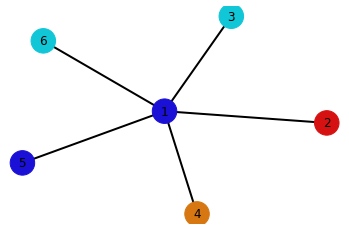


applying baseline predictor to
node 1 : -1 -> 2 (smoothing)
node 5 : -1 -> 2 (baseline)

final node labels and network:
node 1, label 2
node 2, label 1
node 3, label 2
node 4, label 3
node 5, label 2
node 6, label 2


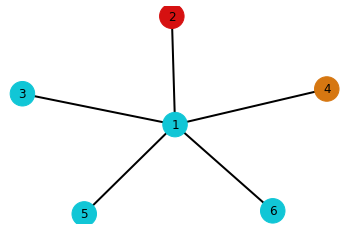

In [236]:
import random as rnd
seed = 822# your MMYY birthday here
rnd.seed(seed)

# a graph and its observed node labels, to start
Go = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6)])
x  = {1: -1, 2: 1, 3: 2, 4: 3, 5: -1, 6: 2}

# to start, display the observed labels and draw G with them
print(f'initial node labels and network:')
for i in x:
    print(f'node {i}, label {x[i]}')
drawGz(Go,x)

xp = {} # put your node labels, after predictions, here (as a dictionary)
print(f'\napplying baseline predictor to')

####################################
##### do not modify above here #####

xp = x.copy() # make a shallow copy of x dictionary (so that the original dictionary is unaffected and predictions are made synchronously)
xp[1] = predictLabel_local(Go,1,x,flag= 1) # run prediction algorithm for node 1
xp[5] = predictLabel_local(Go,5,x,flag= 1) # run prediction algorithm for node 5

##### do not modify above here #####
####################################
print(f'\nfinal node labels and network:')
for i in xp:
    print(f'node {i}, label {xp[i]}')
drawGz(Go,xp)

It is notable that using the local smoothing method for node 1 produces a different outcome than using the baseline predictor and, if this network is assortative, the predicted labels are more accurate. For node 5, the baseline predictor is used because its only neighbor is node one, which is also unlabeled in the empirical data set. 

### Problem 1-D (35 pts) : missingness

Now we get to play with malaria gene data. Let the missingness function $f$ be one that selects a uniformly random _fraction_ $\alpha\in(0,1)$ of attributes to observe. And, define the performance measure to be the `accuracy (ACC)`.

Because $f$ is a stochastic function, the accuracy we calculate will be a random variable. Hence, just like in Problem Set 3, we will need to average the accuracy over several _repetitions_ to get a good estimate.

* Write a function `compute_ACC_onG(G,x,alpha)` that computes the ACC for applying the `local smoothing` predictor to an instance of $G$ in which we observe each node's attribute with probability $\alpha$. This function takes as input the network `G`, the actual node labels `x`, and the value $\alpha$. It should then construct an observed set of labels `xo`, produce a set of predicted labels `xp`, and then return the ACC for those predictions.
* In the cell below that, write a wrapper around your function that computes the ACCs over `nrep=10` repetitions, each with $\alpha=0.8$.
* Report both
  * the list of individual ACCs (one per rep) and
  * their average over all reps.
* Finally, in the discussion box below that, briefly comment about how well `local smoothing` does at this task, in light of any class balance issues.

Hint 1: I used a $c \times c$ numpy array, where $c$ is the number of unique labels in `x`, to construct the confusion matrix, and then used the `np.trace()` and `.sum()` functions to get the ACC.

Hint 2: You can check that your code is about right by trying a few different values of $\alpha$. When I ran it with $\alpha=0.05$, I found ACC $\approx0.50$, and with $\alpha=0.95$, I found ACC $\approx0.70$. This makes sense that ACC should increase with $\alpha$, since at higher values, we're making fewer predictions and have more observed labels to work with.

In [246]:
def compute_ACC_onG(G,x,alpha):
    # input : G, a networkx simple graph
    #         x, (dict) actual labels of nodes in G
    #         alpha, (scalar) fraction of labels to observe
    # output: ACC of local smoothing predictor
    
    #num_observed = int(alpha * len(x))
    #observed = rnd.sample(x.keys(), num_observed)
    
    xo = {} # observed data
    predicted = [] # empty list that will be filled with node keys that will be predicted by the algorithm
    for n in x: # for all the nodes in the data set
        r = rnd.random() # choose a random number
        if r < alpha: # if the number is less than alpha, then that node and its label are observed
            xo[n] = x[n]
        else: # otherwise, we will use our local smoothing algorithm to predict the label
            predicted.append(n) # keeps track of the nodes that we will be predicting values for
            xo[n] = -1 # assigns observed value to be -1 (unobserved)

    xp = xo.copy() # xp (predicted) is a shallow copy of xo (observed)
    for n in xo:
        if xo[n] == -1: # if the label was unobserved, run the local smoothing procedure
            xp[n] = predictLabel_local(G,n,xo,flag= 0)
    
    correct_predictions = sum([1 for n in predicted if x[n] == xp[n]]) # compares predictions to original label values
    num_predictions = len(predicted) # number of total predictions
    if num_predictions == 0: # if none of the labels were predicted (all observed), accuracy is 1 trivially
        return 1
    
    acc = correct_predictions/num_predictions
    
    return acc

In [247]:
compute_ACC_onG(G, z, 0.95)

0.7

In [249]:
import random as rnd
seed = 822 #your MMYY birthday here
rnd.seed(seed)

nreps  = 10   # number of repetitions to average over
alpha  = 0.80  # fraction of labels to observe
ACCs   = []   # list of nrep values of ACC

##### do not modify above here #####
####################################

for _ in range(nreps):
    ACCs.append(compute_ACC_onG(G, z, alpha))

print(f'Accuracy values for all reps: {ACCs}')
print()
####################################
##### do not modify below here #####    
print(f'[ n={n} | reps={nreps} ] <ACC> = %6.3f' % np.mean(ACCs))

Accuracy values for all reps: [0.6923076923076923, 0.6785714285714286, 0.76, 0.7419354838709677, 0.6885245901639344, 0.6862745098039216, 0.6949152542372882, 0.7916666666666666, 0.7368421052631579, 0.6461538461538462]

[ n=298 | reps=10 ] <ACC> =  0.712


In [254]:
sum([1 for n in z if z[n] == 4])/len(z) # this is the proportion of nodes in the network that have label 4

0.5838926174496645

In [262]:
238*0.8/238

0.8

This result at face value seems pretty good, but because label "4" is so much more common than any other label in this dataset, every randomly selected unobserved value will be assigned to "4" which is where most of our accuracy comes from. It makes sense that the accurracy would be around 0.8 every time, even though we are replacing every unlabeled node with a 4. The slight difference between the average accuracy and our calculated accuracy mean is that when a random sample of nodes are selected to be unlabeled, a disproportionately large portion of nodes with labels other than 4 may be selected, which would bring the accuracy below 0.8.

### Problem 1-E (20 pts) putting it all together

Using the code you wrote for `Problem 1-D`, write a simple wrapper around it that performs the full numerical experiment to investigate how the `local smoothing` predictor performs (mean ACC over reps) as a function of how much of the network is labeled (alpha).

* Write the wrapper around your `Problem 1-D` code to measure how the mean ACC varies a function of $\alpha$ on the malaria gene network.

* Produce a single `plot` showing this function, for $\alpha=\{0.1, 0.3, 0.5, 0.7, 0.9\}$ and `nreps=100` (try a smaller number to see how much roughness you're smoothing over).
* (*Extra credit 5pts*: use at least 10 evenly-spaced increments of $\alpha$ between 0 and 1.)

* Briefly discuss what you see about how the ACC varies with $\alpha$. What trend do you see? Does it go in the direction you would expect? Why is the worst accuracy better than $1/c$, where $c$ is the number of unique labels? Try to give some intuition as to why this behavior makes sense given what we know about how `local smoothing` works and the mean degree $\langle k \rangle$ of the malaria gene network.

Hint: As in PS3, a key part of such a numerical experiment is how you store the intermediate results. For each choice of $\alpha$, the core code from `Problem 1-D` will produce a single pair that you can plot $(\alpha,\textrm{ACC})$, but you'll need to store these pairs of values while the rest are being calculated. It may be useful to separate the code for the experiment from the code for the visualization, so that you can tinker with the latter without having to re-run the former.

In [263]:
# YOUR NUMERICAL EXPERIMENT CODE HERE

alpha = [0.025 * n for n in range(1,40)] # use 39 different values of alpha in (0, 1]
nreps = 100 # for each alpha run the experiment 100 times
data = {a: [] for a in alpha} # store accuracy values from each rep in a list associated with the alpha value
for a in alpha:
    for _ in range(nreps):
        data[a].append(compute_ACC_onG(G,z,a))

x_vals = alpha
y_vals = [np.mean(data[a]) for a in alpha] # take the mean of all accuracies associated with specific alpha

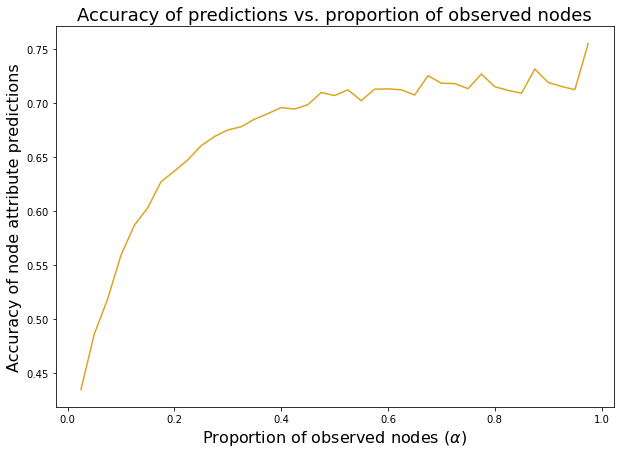

In [264]:
# YOUR PLOTTING CODE HERE

plt.figure(figsize=(10, 7))
plt.plot(x_vals, y_vals, color='goldenrod')
plt.title("Accuracy of predictions vs. proportion of observed nodes", fontsize = 18)
plt.xlabel(r'Proportion of observed nodes ($\alpha$)', fontsize = 16)
plt.ylabel('Accuracy of node attribute predictions', fontsize = 16)
plt.show()

The accuracy increases between alpha = 0 and alpha = 0.2 about, but then after that it pretty much flattens out around 0.7, which can be explained similar to above because of the high proportion of "4" labels in the network. <br>
The worst accuracy is better than 1/$c$ because 4 is **so much more common** than any of the other labels and the mean degree of this network is 18, it would be very rare for a node to not have a neighbor with the label 4 (and by extension the mode of the labels of its neighbors to be 4). So, in most of the trials with very few observed data points, all of the nodes will be labeled 4 (so about 58% of the guesses will be right because about 58% of the nodes in this network have label 4). The reason the accuracy is lower than this though is that there will be cases in the random draw that no neighbor nodes with label 4 will be observed, which means that a different label will be assigned by the local smoothing procedure, bringing the accuracy down.

***
***

## Problem 2 : Reading the literature (*10 pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](https://aaronclauset.github.io/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

Hint: This is a good way to generate some ideas for your class project. Also, even if you don't understand everything in the paper, that's okay. Do your best to summarize what you did understand.

* *What paper did you choose?*<br/>
Give the Authors, Title, Publication Venue, Year
<br/>

* *What was the research question?*<br/>
Your answer here
<br/>

* *What was the approach the authors took to answer that question?*<br/>
Your answer here
<br/>

* *What did they do well?*<br/>
Your answer here
<br/>

* *What could they have done better?*<br/>
Your answer here
<br/>

* *What extensions can you envision?*<br/>
Your answer here